In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from keras.models import Sequential
import numpy as np
import cv2
import random
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Capstone/Garbageclassificationnew.zip

Archive:  /content/gdrive/MyDrive/Capstone/Garbageclassificationnew.zip
   creating: Garbage classification/cardboard/
  inflating: Garbage classification/cardboard/cardboard1.jpg  
  inflating: Garbage classification/cardboard/cardboard10.jpg  
  inflating: Garbage classification/cardboard/cardboard100.jpg  
  inflating: Garbage classification/cardboard/cardboard101.jpg  
  inflating: Garbage classification/cardboard/cardboard102.jpg  
  inflating: Garbage classification/cardboard/cardboard103.jpg  
  inflating: Garbage classification/cardboard/cardboard104.jpg  
  inflating: Garbage classification/cardboard/cardboard105.jpg  
  inflating: Garbage classification/cardboard/cardboard106.jpg  
  inflating: Garbage classification/cardboard/cardboard107.jpg  
  inflating: Garbage classification/cardboard/cardboard108.jpg  
  inflating: Garbage classification/cardboard/cardboard109.jpg  
  inflating: Garbage classification/cardboard/cardboard11.jpg  
  inflating: Garbage classification/card

In [ ]:
dir_path = '/content/Garbage classification'

In [ ]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))
len(img_list)

2959

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255,
                                     validation_split=0.1)

train_generator = train_generator.flow_from_directory(dir_path,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse',
                                                      subset='training')


Found 2665 images belonging to 6 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255,
                                    validation_split=0.1)

test_generator = test_generator.flow_from_directory(dir_path,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse',
                                                    subset='validation')

Found 294 images belonging to 6 classes.


In [ ]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(6,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [ ]:
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch=2665//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
83/83 [==============================] - 25s 148ms/step - loss: 1.6390 - accuracy: 0.2750
Epoch 2/10
83/83 [==============================] - 13s 153ms/step - loss: 1.4283 - accuracy: 0.3950
Epoch 3/10
83/83 [==============================] - 12s 145ms/step - loss: 1.2695 - accuracy: 0.4930
Epoch 4/10
83/83 [==============================] - 12s 145ms/step - loss: 1.1759 - accuracy: 0.5492
Epoch 5/10
83/83 [==============================] - 12s 144ms/step - loss: 1.0458 - accuracy: 0.5894
Epoch 6/10
83/83 [==============================] - 13s 157ms/step - loss: 0.9586 - accuracy: 0.6320
Epoch 7/10
83/83 [==============================] - 12s 144ms/step - loss: 0.8137 - accuracy: 0.6935
Epoch 8/10
83/83 [==============================] - 12s 143ms/step - loss: 0.6793 - accuracy: 0.7410
Epoch 9/10
83/83 [==============================] - 12s 144ms/step - loss: 0.5948 - accuracy: 0.7805
Epoch 10/10
83/83 [==============================] - 12s 144ms/step - loss: 0.4926 - accura

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


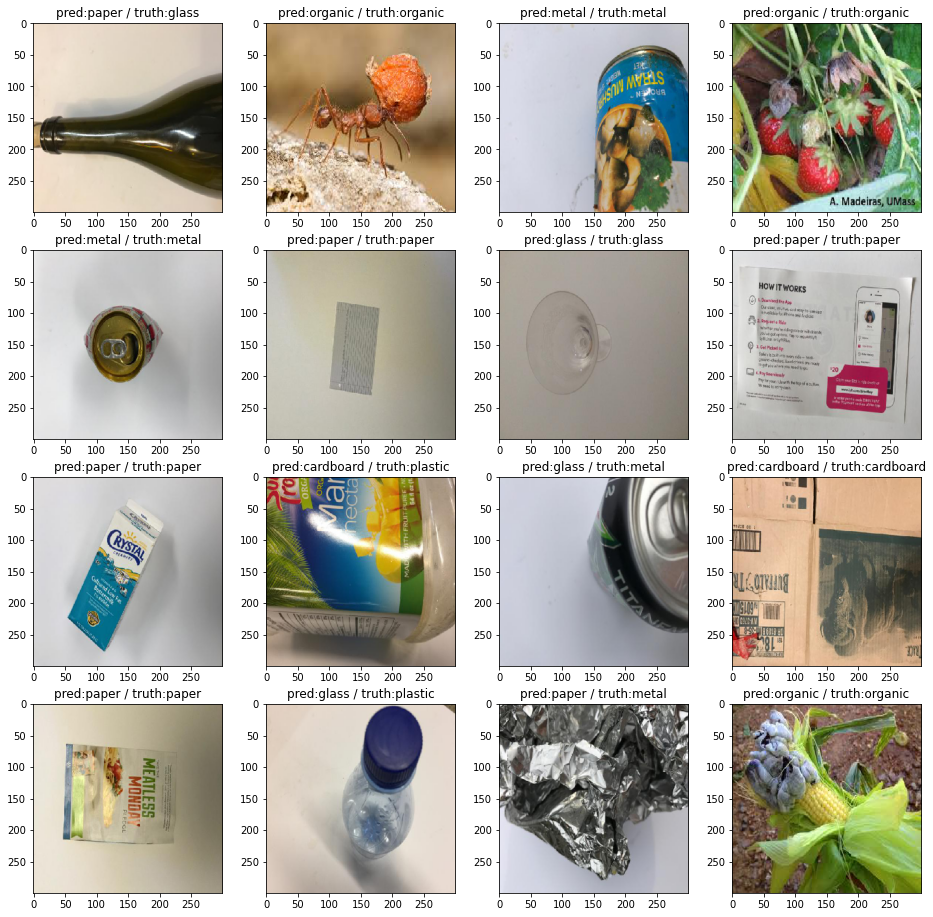

In [ ]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_classify.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpvx0mtpgh/assets


In [ ]:
from IPython.display import FileLinks
FileLinks('.')